In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import utils
import pickle
from scipy.optimize import minimize

In [2]:
# ### GCaMP8f dataset
# filename = 'data/All_Data_withGC8.mat'
# data = scipy.io.loadmat(filename)
# T4_arclight = data['data']*100.0
# T4_gcamp6 = data['data2']*100.0
# T4_gcamp8 = data['data8']*100.0

In [3]:
#### GCaMP6f complete dataset
filename = 'data/All_Data.mat'
data = scipy.io.loadmat(filename) #complete dataset: velocity 48, contrast 48, Edge velocity 8, Edge contrast 8
T4_arclight = data['data']*100.0
T4_gcamp = data['data2']*100.0

In [6]:
# ### Mi1 dataset
# filename = 'data/Grating_Velocity - Mi1.mat'
# data = scipy.io.loadmat(filename)  #4 speed. direction doesn't matter. so only 90 degrees direction
# Mi1_arclight = data['data']*100.0
# Mi1_gcamp = data['data2']*100.0

In [4]:
#T4_gcamp = T4_gcamp8
#T4_gcamp=Mi1_gcamp
#T4_arclight = Mi1_arclight
#T4_arclight = T4_arclight[:,12:16] #choosing T490deg velocity
#T4_gcamp = T4_gcamp[:, 12:16]
T4_arclight.shape, T4_gcamp.shape #, T4_gcamp6.shape, T4_gcamp8.shape

((113, 112), (113, 112))

In [5]:
# def plot_trace(data, color, filename):
#     f, ax = plt.subplots(1,1)
#     ax.plot(data, color = color)
#     plt.axis('off')
#     plt.savefig('/Volumes/Elements/Project_T4_VoltageCalcium/PaperFigures/figures/figgures_forppt/'+filename+'.pdf',transparent=True)

In [6]:
def plot_trace(data, color, filename,savefig=False):
    f, ax = plt.subplots(1,1)
    for i in range(len(data)):
        ax.plot(data[i], color = color[i])
    plt.axis('off')
    if savefig:
        plt.savefig('/Volumes/Elements/Project_T4_VoltageCalcium/PaperFigures/figures/figgures_forppt/'+filename+'.pdf',transparent=True)

In [8]:
gcamp = T4_gcamp[10:-10,17]
arclight = T4_arclight[10:-10,17]
T4_gcamp = gcamp
T4_arclight = arclight

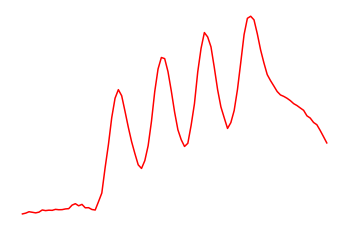

In [131]:
plot_trace([gcamp], ['r'], 'gcamp_trace', savefig=True)

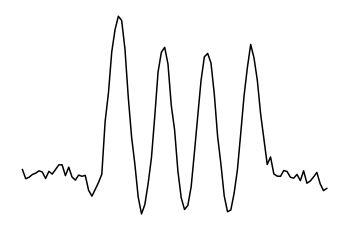

In [50]:
plot_trace([arclight], ['k'], 'arclight_trace',savefig=True)

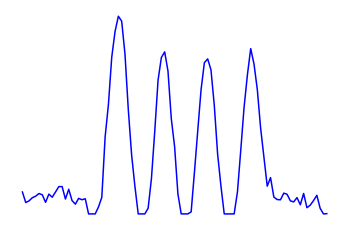

In [133]:
arclight_thres = threshold_cut(arclight.copy(), -0.8)
plot_trace([arclight_thres], ['b'], 'arclight_thres',savefig=True)

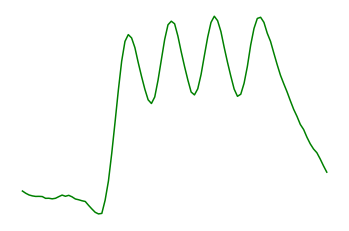

In [126]:
lowpass_signal_fast = lowpass(arclight_thres.copy(), 1.0,dt=1/13.0)
#lowpass_gain = lowpass_signal * 30.0
#lowpass_gain_shift = np.roll(lowpass_gain, int(-2), axis=0)
plot_trace([lowpass_signal_fast], ['g'], 'lowpass_fast') 
#plot_trace(gcamp, 'b', 'lowpass')

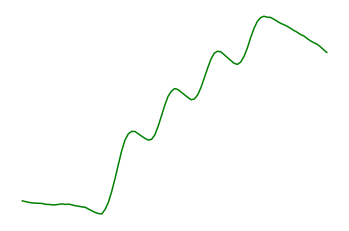

In [127]:
lowpass_signal_slow = lowpass(arclight_thres.copy(), 10.0,dt=1/13.0)
#lowpass_gain = lowpass_signal * 30.0
#lowpass_gain_shift = np.roll(lowpass_gain, int(-2), axis=0)
plot_trace([lowpass_signal_slow], ['g'], 'lowpass_slow') 
#plot_trace(gcamp, 'b', 'lowpass')

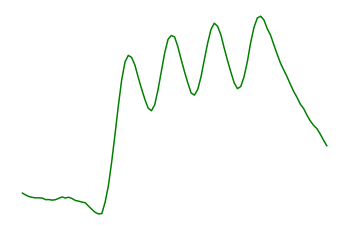

In [128]:
lowpass_add = lowpass_signal_fast + lowpass_signal_slow
plot_trace([lowpass_add], ['g'], 'lowpass_add') 

In [35]:
(tauhp, thres, taulp1, taulp2, gain1, gain2, shift) = (0.02, -0.10,0.31, 4.33, 110.18, 1000.00, -0.17)

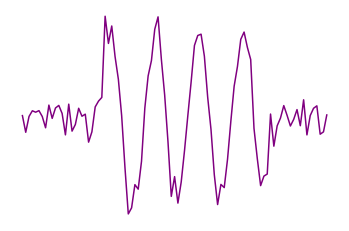

In [40]:
arc_highpass = highpass(arclight.copy(), 0.02, dt=1/13.0)
plot_trace([arc_highpass], ['purple'], 'arc_highpass', savefig=True)
#plt.plot(arc_highpass)

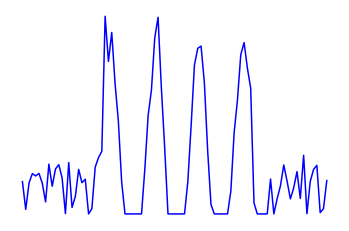

In [41]:
arc_highpass_thres = threshold_cut(arc_highpass.copy(), -0.10)
plot_trace([arc_highpass_thres], ['blue'], 'arc_highpass_thres', savefig=True)

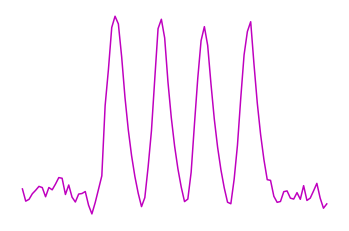

In [46]:
lowpass_signal_fast = lowpass(arc_highpass_thres.copy(), 0.31,dt=1/13.0) * 110.8
plot_trace([lowpass_signal_fast], ['m'], 'arc_lowpass_fast',savefig=True)

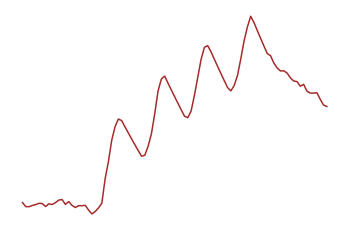

In [47]:
lowpass_signal_slow = lowpass(arc_highpass_thres.copy(), 4.33,dt=1/13.0) * 1000.0
plot_trace([lowpass_signal_slow], ['brown'], 'arc_lowpass_slow',savefig=True)

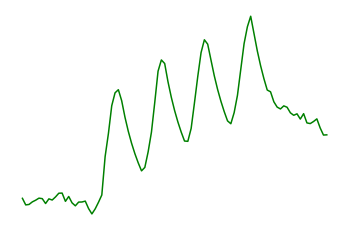

In [48]:
lowpass_add = lowpass_signal_fast + lowpass_signal_slow
plot_trace([lowpass_add], ['g'], 'arc_lowpass_add',savefig=True) 

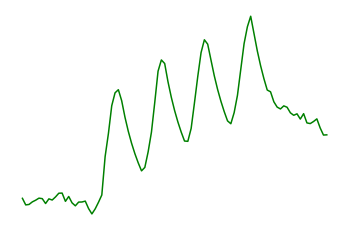

In [49]:
lowpass_add_shift = np.roll(lowpass_add, int(-0.17), axis=0)
plot_trace([lowpass_add_shift], ['g'], 'arc_lowpass_add_shift',savefig=True) 

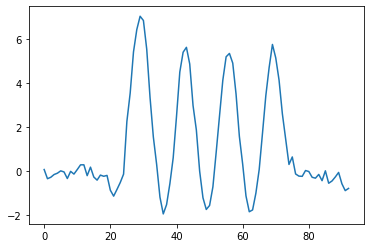

In [109]:
plt.plot(arclight)

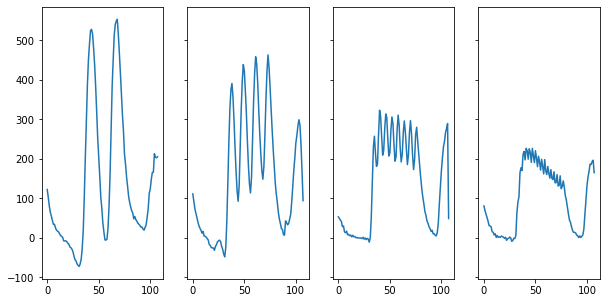

In [7]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_gcamp[:,0]); ax[1].plot(T4_gcamp[:,1]); ax[2].plot(T4_gcamp[:,2]);ax[3].plot(T4_gcamp[:,3]);

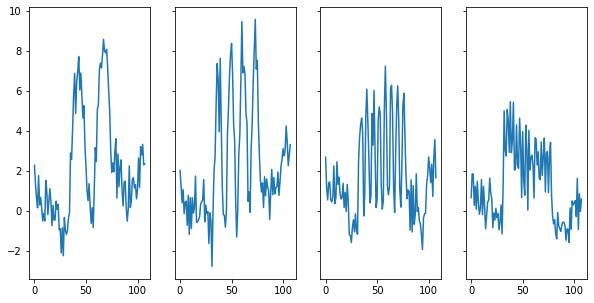

In [8]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_arclight[:,0]); ax[1].plot(T4_arclight[:,1]); ax[2].plot(T4_arclight[:,2]);ax[3].plot(T4_arclight[:,3]);

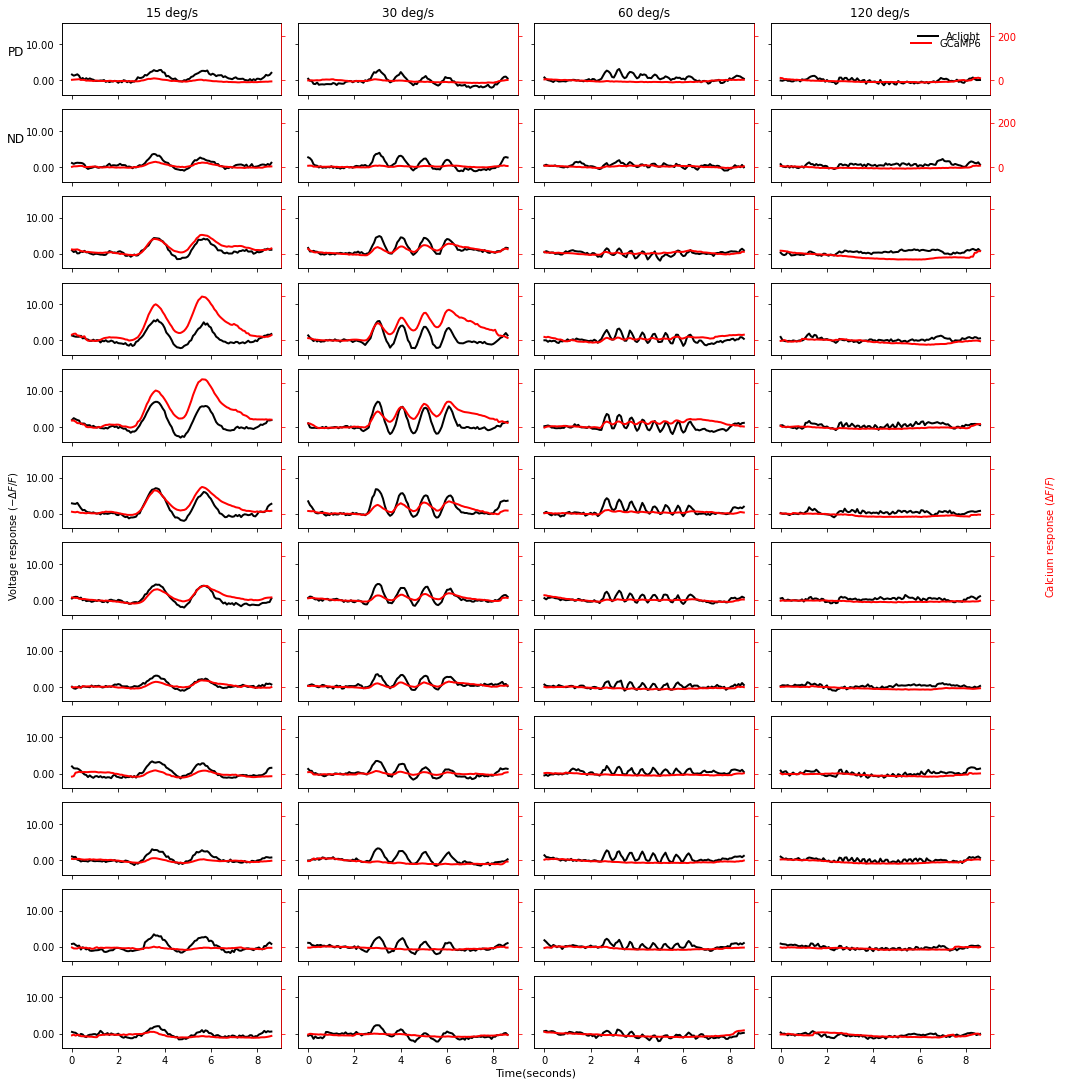

In [41]:
velocity = [15, 30, 60, 120]
#utils.plot_data_twinaxis([T4_arclight[10:,0:8], T4_gcamp[10:,0:8]], ylim=(-0.20,2.50), savefig=True, title='Gratings_SpeedPDND');
#utils.plot_data_twinaxis([T4_arclight, T4_gcamp], fig_size=(15,15),speed=velocity,ylim1=(-0.04,0.10),ylim2=(-0.30,2.60),savefig=False, title='Ori_Vel');
utils.plot_data_twinaxis([T4_arclight[:,0:48], T4_gcamp6[:,0:48]], legend=['Aclight','GCaMP6'],fig_size=(15,15),speed=velocity,ylim1=(-4,10),ylim2=(-30,260),savefig=False, title='Ori_Vel');

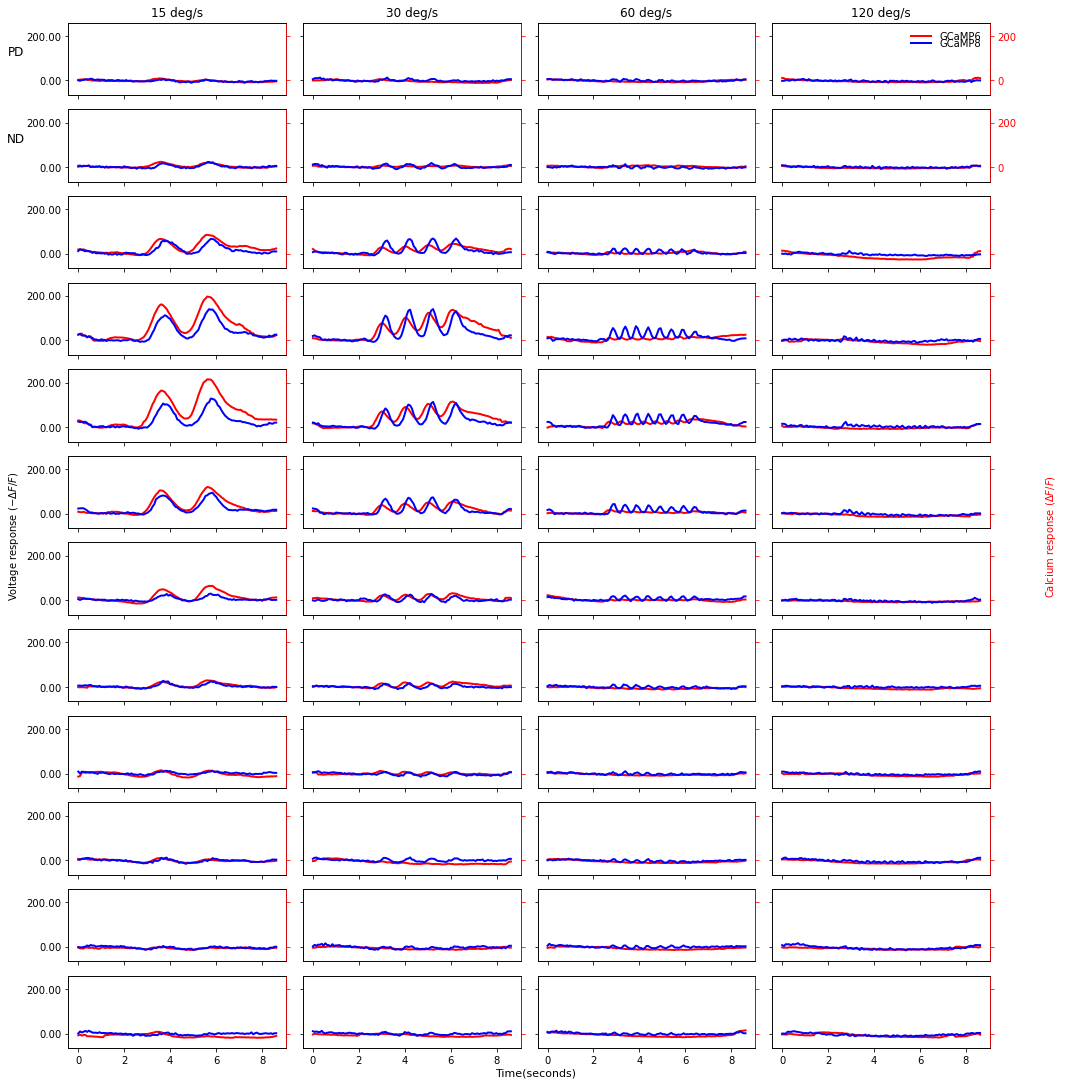

In [537]:
velocity = [15, 30, 60, 120]
#utils.plot_data_twinaxis([T4_arclight[10:,0:8], T4_gcamp[10:,0:8]], ylim=(-0.20,2.50), savefig=True, title='Gratings_SpeedPDND');
#utils.plot_data_twinaxis([T4_arclight, T4_gcamp], fig_size=(15,15),speed=velocity,ylim1=(-0.04,0.10),ylim2=(-0.30,2.60),savefig=False, title='Ori_Vel');
utils.plot_data_twinaxis([T4_gcamp6[:,0:48], T4_gcamp8[:,0:48]], legend=['GCaMP6','GCaMP8'],c=['r','b'],fig_size=(15,15),speed=velocity,ylim1=(-30,260),ylim2=(-30,260),savefig=False, title='Ori_Vel');

In [119]:
velocity=[15,30,60,120]
utils.plot_data_twinaxis([T4_arclight[:,48:], T4_gcamp6[:,48:]],speed=velocity,legend=['Aclight','GCaMP6'],c=['k','r'],ylim1=(-4,10),ylim2=(-20,600))

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 720x360 with 0 Axes>

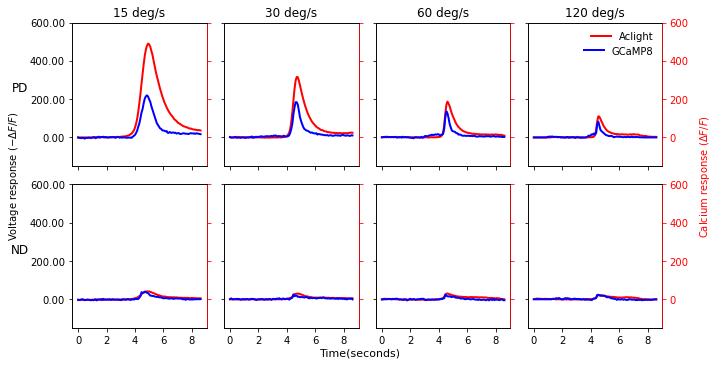

In [539]:
velocity=[15,30,60,120]
utils.plot_data_twinaxis([T4_gcamp6[:,48:], T4_gcamp8[:,48:]],speed=velocity,legend=['Aclight','GCaMP8'],c=['r','b'],ylim1=(-20,600),ylim2=(-20,600))

In [24]:
T4_arclight.min(), T4_arclight.max()

(-1.9462629723272094, 7.019594829631708)

In [25]:
global p_bounds 

#bounds on parameters (tauhp, thres, taulp1, taulp2, gain, shift)
#p_bounds = ((0,1000),(T4_arclight.min()*100, T4_arclight.max()*100),(0,300),(0,2000),(0,1000),(-5,0))

#bounds on parameters for L model (tauhp, thres, taulp1, taulp2, gain1, gain2 shift)
p_bounds_L = ((0,1000),(T4_arclight.min()*100, T4_arclight.max()*100),(0,300),(0,2000),(0,1000),(0,1000),(-5,0))

p_bounds = p_bounds_L #for L model

In [26]:
def M_model(x, p, dt=(1/13.0), plot=False):
    """x is Arclight data. p is list of parameters. dt is timestep"""
    (tauhp, thres, taulp1, taulp2, gain, shift) = p
    x_highpass = highpass(x.copy(), tauhp/100.0, dt)
    x_thres = threshold_cut(x_highpass.copy(), thres/100.0)
    x_thres_lp1 = lowpass(x_thres.copy(), taulp1/100.0, dt)
    x_thres_lp2 = lowpass(x_thres.copy(), taulp2/100.0, dt)
    x_1 = x_thres_lp1 * x_thres_lp2
    x_2 = x_1 * gain
    y = np.roll(x_2, int(shift), axis=0)
    if plot==True:
        utils.plot_data([x, x_thres, x_1, x_2, y], c=['k','grey','g','brown','r']);
    return y

def L_model(x, p, dt=(1/13.0), plot=False):
    """x is Arclight data. p is list of parameters. dt is timestep"""
    (tauhp, thres, taulp1, taulp2, gain1, gain2, shift) = p
    x_highpass = highpass(x.copy(), tauhp/100.0, dt)
    x_thres = threshold_cut(x_highpass.copy(), thres/100.0)
    x_thres_lp1 = lowpass(x_thres.copy(), taulp1/100.0, dt)*gain1
    x_thres_lp2 = lowpass(x_thres.copy(), taulp2/100.0, dt)*gain2
    x_1 = x_thres_lp1 + x_thres_lp2
    y = np.roll(x_1, int(shift), axis=0)
    if plot==True:
        utils.plot_data([x, x_thres, x_1, x_2, y], c=['k','grey','g','brown','r']);
    return y

In [27]:
def lowpass(x, tau, dt):
    y = np.zeros_like(x)
    n = x.shape[0]   #length of time dimension
    alpha = dt / (tau+dt)
    y[0] = x[0]
    for i in np.arange(1,n):
        y[i] = alpha*x[i] + (1-alpha)*y[i-1]
    return y

def highpass(x, tau, dt):
    y = x - lowpass(x, tau, dt)
    return y

def bandpass(x, tauhp, taulp, dt):
    y = highpass(x, tauhp, dt)
    y = lowpass(y, taulp, dt)
    return y

def threshold_cut(x, thres):
    x_copy = x.copy()
    x_copy[x_copy<thres] = thres
    return x_copy 

def create_random_params():
    p = [np.random.uniform(bounds[0], bounds[1]) for bounds in p_bounds]
    #print(p)
    return p  

def calc_error(p):
    #T4Ca_model = M_model(T4_arclight, p)
    T4Ca_model = L_model(T4_arclight, p)
    
    #error = np.mean(np.sqrt(np.mean((T4_gcamp-T4Ca_model)**2,axis=0)))
    #error = (T4_gcamp[10:100,:]-T4Ca_model[10:100,:])**2
    #error = np.mean(np.sqrt(np.mean((T4_gcamp[10:100,:]-T4Ca_model[10:100,:])**2,axis=0)))/np.mean(np.sqrt(np.mean(T4_gcamp[10:100,:]**2,axis=0)))
    error = np.sum((T4_gcamp-T4Ca_model)**2)
    #error = np.sum((T4_gcamp[10:100,:]-T4Ca_model[10:100,:])**2)
    return error

def fit_params():
    p = create_random_params() #creates random parameter values
    #options = {'maxiter':5000} #maximum number of iterations
    res = minimize(calc_error, p, bounds=p_bounds)#options=options
    success = res.success
    if success:
        print('Optimisation successful')
    else:
        print('Optimisation not succesfull')
    p = res.x
    error = calc_error(p)
    print('Remaining Error: ', format(calc_error(p),".2f"))
    print(res)
    return p, error, success

In [28]:
def many_runs(n):
    (p_list, err_list) = ([],[]) 
    for i in range(n):
        print('run : '+str(i))
        (par, err, success) = fit_params()
        if success:
            print(par)
            p_list.append(par)
            err_list.append(err)
    return p_list, err_list
    

In [29]:
para_list, err_list = many_runs(300)

run : 0
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.,  0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([   0.        , -194.62629723,  300.        ,  911.52426444,
          0.        ,    0.        ,   -4.92362564])
[   0.         -194.62629723  300.          911.52426444    0.
    0.           -4.92362564]
run : 1
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([   0.        , -194.62629723,  300.        , 2000.        ,
          0.        ,    0.        ,

Optimisation successful
Remaining Error:  11820.21
      fun: 11820.211775277903
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.31459988e-01, -9.31686957e-01, -0.00000000e+00, -3.50886767e-01,
        1.20418918e+01,  8.18544582e-03, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 872
      nit: 40
     njev: 109
   status: 0
  success: True
        x: array([  35.19172026, -124.75412095,  300.        , 1886.75088621,
          0.        ,  876.25280961,   -3.99749334])
[  35.19172026 -124.75412095  300.         1886.75088621    0.
  876.25280961   -3.99749334]
run : 33
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.,  0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([   0.    

Optimisation successful
Remaining Error:  2590.63
      fun: 2590.6302993034315
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04138201, -0.00263754, -0.02692102,  0.00027285, -0.00040927,
       -0.16325417, -0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1168
      nit: 105
     njev: 146
   status: 0
  success: True
        x: array([   7.43363749,  -64.59671313,  300.        ,  665.97564129,
         15.15349488, 1000.        ,   -1.50046464])
[   7.43363749  -64.59671313  300.          665.97564129   15.15349488
 1000.           -1.50046464]
run : 53
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([ 0.00000000e+00, -1.94626297

Optimisation successful
Remaining Error:  2590.89
      fun: 2590.8870387084044
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.00226317e-01, -2.68301105e-03,  9.09493980e-05,  1.18234217e-03,
       -3.58795660e-02, -1.96177852e-01, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1104
      nit: 97
     njev: 138
   status: 0
  success: True
        x: array([ 7.45246935e+00, -6.46692943e+01,  3.00000000e+02,  6.46370292e+02,
        7.51420372e-03,  1.00000000e+03, -1.50504154e+00])
[ 7.45246935e+00 -6.46692943e+01  3.00000000e+02  6.46370292e+02
  7.51420372e-03  1.00000000e+03 -1.50504154e+00]
run : 71
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  succe

Optimisation successful
Remaining Error:  19743.41
      fun: 19743.41373254378
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([   3.71000784,    7.5233449 ,   31.16726731,    0.87166894,
       -203.55690274,   -4.52709724,   -0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 344
      nit: 21
     njev: 43
   status: 0
  success: True
        x: array([ 3.90145219e+02, -1.07931496e+02,  1.41997516e+02,  1.84707742e+03,
        1.55201234e+01,  2.51831582e+02, -1.19759011e+00])
[ 3.90145219e+02 -1.07931496e+02  1.41997516e+02  1.84707742e+03
  1.55201234e+01  2.51831582e+02 -1.19759011e+00]
run : 88
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
       

Optimisation successful
Remaining Error:  113562.62
      fun: 113562.62450015167
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        , -0.03783495, -0.        , -0.        ,  0.        ,
        0.        , -0.        ])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([   0.        ,  701.95948296,  300.        , 2000.        ,
          3.15166783,    3.53012927,   -3.77561376])
[   0.          701.95948296  300.         2000.            3.15166783
    3.53012927   -3.77561376]
run : 111
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.,  0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([   0.        , -194.62629723, 

Optimisation successful
Remaining Error:  5543.80
      fun: 5543.804125726861
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.81943334e-03,  5.91171927e-03,  0.00000000e+00, -1.09140518e-03,
        3.20715117e+00, -5.75891588e-01, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1192
      nit: 86
     njev: 149
   status: 0
  success: True
        x: array([  19.6819476 , -119.95942756,  281.86453987, 1408.60564764,
          0.        , 1000.        ,   -2.25612195])
[  19.6819476  -119.95942756  281.86453987 1408.60564764    0.
 1000.           -2.25612195]
run : 130
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0.,  0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([ 0.000000

Optimisation successful
Remaining Error:  1330.50
      fun: 1330.5011809335488
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.76692084e-01,  1.14368949e-02,  9.09494627e-05, -2.95585544e-04,
        5.22959782e-04, -1.35378179e-01, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1720
      nit: 138
     njev: 215
   status: 0
  success: True
        x: array([ 2.48698534e+00, -1.02833499e+01,  3.11358953e+01,  4.33064128e+02,
        1.10176864e+02,  1.00000000e+03, -1.74046182e-01])
[ 2.48698534e+00 -1.02833499e+01  3.11358953e+01  4.33064128e+02
  1.10176864e+02  1.00000000e+03 -1.74046182e-01]
run : 145
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  suc

Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([   0.        , -194.62629723,  300.        , 2000.        ,
          0.        ,    0.        ,   -2.01034537])
[   0.         -194.62629723  300.         2000.            0.
    0.           -2.01034537]
run : 179
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([ 0.00000000e+00, -1.94626297e+02,  3.00000000e+02,  2.00000000e+03,
        0.00000000e+00,  0.0000000

Optimisation successful
Remaining Error:  16950.86
      fun: 16950.863390432012
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.33238594e-01,  5.61230545e+00, -3.63798109e-04, -5.09322419e-02,
        2.18278710e-03, -3.63797592e-04, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 856
      nit: 72
     njev: 107
   status: 0
  success: True
        x: array([1000.        , -194.62629723,   66.81409844, 2000.        ,
         10.53131837,  263.34743401,   -4.19941849])
[1000.         -194.62629723   66.81409844 2000.           10.53131837
  263.34743401   -4.19941849]
run : 196
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([

Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([   0.        , -194.62629723,  300.        , 2000.        ,
          0.        ,    0.        ,   -2.35943757])
[   0.         -194.62629723  300.         2000.            0.
    0.           -2.35943757]
run : 217
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([   0.        , -194.62629723,  300.        , 2000.        ,
          0.        ,    0.        ,   -4.

Optimisation successful
Remaining Error:  5029.30
      fun: 5029.300006881105
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.08999443e-01, -2.63753442e-03,  7.87012141e+02, -1.81898796e-04,
       -2.51020517e-02, -8.18545745e-04, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1280
      nit: 104
     njev: 160
   status: 0
  success: True
        x: array([ 1.00000000e+03, -6.19209574e+01,  0.00000000e+00,  7.29127810e+02,
        8.45188683e+00,  9.86429116e+01, -1.44258637e-01])
[ 1.00000000e+03 -6.19209574e+01  0.00000000e+00  7.29127810e+02
  8.45188683e+00  9.86429116e+01 -1.44258637e-01]
run : 235
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  succ

Optimisation successful
Remaining Error:  2590.63
      fun: 2590.6303039058425
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.06220944, -0.00231921, -0.02705745,  0.00090949, -0.00077307,
       -0.16339059, -0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1096
      nit: 96
     njev: 137
   status: 0
  success: True
        x: array([   7.43362547,  -64.59682978,  300.        ,  666.06388115,
         15.21482024, 1000.        ,   -1.21026302])
[   7.43362547  -64.59682978  300.          666.06388115   15.21482024
 1000.           -1.21026302]
run : 261
Optimisation successful
Remaining Error:  9288.35
      fun: 9288.345558315137
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.83398324e-01,  4.05343277e+00, -5.45696776e-04, -4.40200091e-02,
       -7.27595701e-04, -7.27595184e-04, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 584
      nit: 5

Optimisation successful
Remaining Error:  5029.30
      fun: 5029.3000144588805
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.09636089e-01,  6.36646239e-04,  7.86987766e+02, -6.36645786e-04,
        3.63797851e-04, -1.81899055e-04, -0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1160
      nit: 99
     njev: 145
   status: 0
  success: True
        x: array([ 1.00000000e+03, -6.19058775e+01,  0.00000000e+00,  7.28956799e+02,
        8.45184553e+00,  9.86218694e+01, -2.74671910e-01])
[ 1.00000000e+03 -6.19058775e+01  0.00000000e+00  7.28956799e+02
  8.45184553e+00  9.86218694e+01 -2.74671910e-01]
run : 294
Optimisation successful
Remaining Error:  318156.97
      fun: 318156.9673938707
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0., -0., -0.,  0.,  0., -0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 1
     njev: 2
   status: 0
  succ

In [ ]:
# model_para = np.load('model_parameters/scipymini_newmodel_alldatasetcombined.npy')
# print(f'(tauhp, thres, taulp1, taulp2, gain, shift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f})')

In [30]:
model_para = para_list[np.argmin(err_list)]
print(np.min(err_list))
print(np.min(err_list) / np.sum((T4_gcamp)**2))
#print(f'(thres, taulp1, gain1, taulp2, gain2, tshift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f})')
#print(f'(thres, tauhp, taulp1, gain1, taulp2, gain2, tshift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]:.2f}, {model_para[4]/100:.2f}, {model_para[5]:.2f}, {model_para[6]:.2f})')
#print(f'(tauhp, thres, taulp1, taulp2, gain, shift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f})')
print(f'(tauhp, thres, taulp1, taulp2, gain1, gain2, shift) = ({model_para[0]/100:.2f}, {model_para[1]/100:.2f},{model_para[2]/100:.2f}, {model_para[3]/100:.2f}, {model_para[4]:.2f}, {model_para[5]:.2f}, {model_para[6]:.2f})')

#print(model_para/100) # (thres, taulp1, gain1, taulp2, gain2, tshift)

1330.5011809335488
0.004181901756960174
(tauhp, thres, taulp1, taulp2, gain1, gain2, shift) = (0.02, -0.10,0.31, 4.33, 110.18, 1000.00, -0.17)


In [31]:
#model_p = fit_params()
#T4Ca_model = M_model(T4_arclight, model_para, plot=False)
T4Ca_model = L_model(T4_arclight, model_para, plot=False)
#plot_data([T4_Gcamp, T4Ca_model])

In [32]:
np.sum((T4_gcamp-T4Ca_model)**2) / np.sum((T4_gcamp)**2)

0.004181901756960174

In [33]:
# T4_gcamp = T4_gcamp / 100.0
# T4Ca_model = T4Ca_model / 100.0

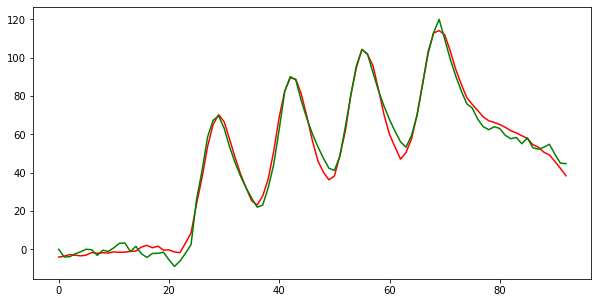

In [34]:
#plotting Mi1 data
f,ax = plt.subplots(1,1,figsize=(10,5),sharey=True)
ax.plot(T4_gcamp, color='r')
ax.plot(T4Ca_model, color='g')
#ax[0].plot(T4_gcamp[:,0]); ax[1].plot(T4_gcamp[:,1]); ax[2].plot(T4_gcamp[:,2]);ax[3].plot(T4_gcamp[:,3]);
#ax[0].plot(T4Ca_model[:,0],color='g'); ax[1].plot(T4Ca_model[:,1],color='g'); ax[2].plot(T4Ca_model[:,2],color='g');ax[3].plot(T4Ca_model[:,3],color='g');

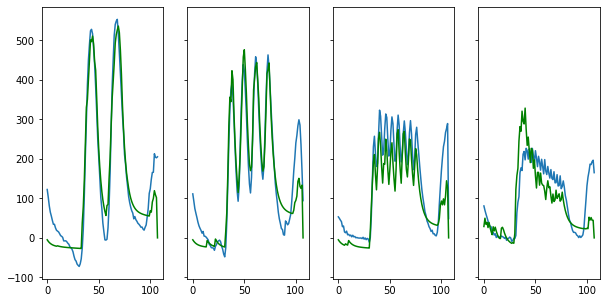

In [16]:
#plotting Mi1 data
f,ax = plt.subplots(1,4,figsize=(10,5),sharey=True)
ax[0].plot(T4_gcamp[:,0]); ax[1].plot(T4_gcamp[:,1]); ax[2].plot(T4_gcamp[:,2]);ax[3].plot(T4_gcamp[:,3]);
ax[0].plot(T4Ca_model[:,0],color='g'); ax[1].plot(T4Ca_model[:,1],color='g'); ax[2].plot(T4Ca_model[:,2],color='g');ax[3].plot(T4Ca_model[:,3],color='g');

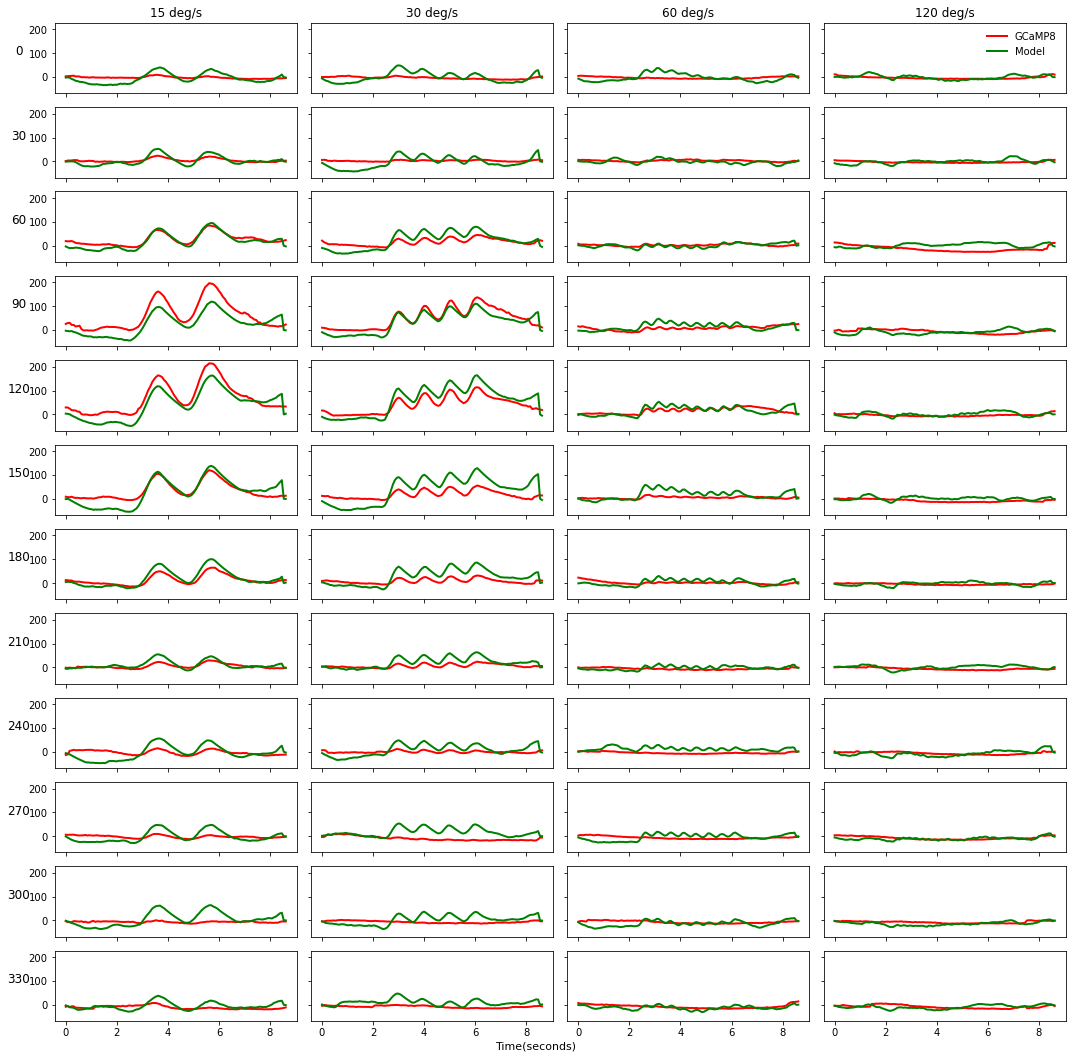

In [96]:
velocity = [15, 30, 60, 120]
utils.plot_data([T4_gcamp[:,0:48], T4Ca_model[:,0:48]], ori=True,label=['GCaMP8','Model'],c=['r','g'],fig_size=(15,15),speed=velocity,savefig=False, title='Ori_Vel');
#utils.plot_data_twinaxis([T4_gcamp[0:107,0:48], T4Ca_model[0:107,0:48]],speed=velocity,c=['r','g'])
#plt.savefig('figures/scipymini_wholedatasetfit/Ori_Velocity_model.pdf',dpi=1000)

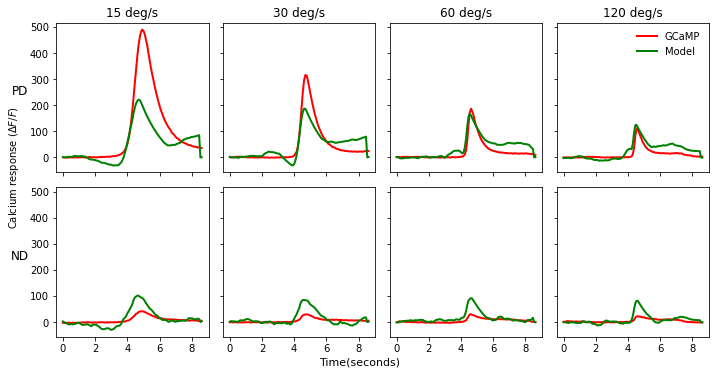

In [97]:
velocity=[15,30,60,120]
#utils.plot_data([T4_gcamp[:,48:], T4Ca_model[:,48:]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
utils.plot_data([T4_gcamp[:,96:104], T4Ca_model[:,96:104]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
#plt.savefig('figures/scipymini_wholedatasetfit/EdgePDND_model.pdf',dpi=1000)

In [42]:
err_list = a['err']
para_list = a['para']

In [43]:
err_array = np.array(err_list) / np.sum((T4_gcamp[10:100,:])**2)

In [44]:
idx = np.argpartition(err_list, 10)

In [45]:
err_array[idx[:10]]

array([0.249, 0.249, 0.249, 0.249, 0.249, 0.249, 0.249, 0.249, 0.249,
       0.251])

In [46]:
from scipy.stats import sem
np.mean(err_array[idx[:10]]), np.std(err_array[idx[:10]]), sem(err_array[idx[:10]])

(0.2490347112409733, 0.0006655961364850431, 0.00022186537882834764)

In [47]:
para_array = np.array(para_list)
#para_array[:,:5] = para_array[:,:5]/100.0
para_array[:,:6] = para_array[:,:6]/100.0

In [48]:
#np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
para_array[idx[:10]]

array([[0.236, -0.212, 1.342, 1.343, 1.368, -0.008],
       [0.236, -0.212, 1.341, 1.344, 1.368, -0.006],
       [0.236, -0.212, 1.343, 1.343, 1.368, -0.008],
       [0.236, -0.212, 1.341, 1.344, 1.368, -0.002],
       [0.236, -0.212, 1.340, 1.345, 1.368, -0.004],
       [0.236, -0.212, 1.343, 1.343, 1.368, -0.005],
       [0.236, -0.212, 1.341, 1.344, 1.368, -0.001],
       [0.236, -0.212, 1.342, 1.343, 1.368, -0.001],
       [0.236, -0.212, 1.338, 1.347, 1.368, -0.002],
       [0.303, -0.237, 1.602, 1.603, 1.219, -0.015]])

In [49]:
para_array[idx[:10],:5].shape

(10, 5)

In [50]:
np.std(para_array[idx[:10],:5],axis=0)

array([0.020, 0.007, 0.078, 0.078, 0.045])

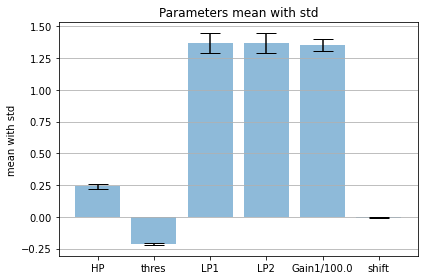

In [51]:
f, ax = plt.subplots()
labels = ['HP', 'thres', 'LP1', 'LP2', 'Gain1/100.0','shift']
#labels = ['HP', 'thres', 'LP1', 'LP2', 'Gain1/100.0','Gain2/100.0','shift']
x_pos = np.arange(len(labels))
mean = np.mean(para_array[idx[:10],:],axis=0)
std = np.std(para_array[idx[:10],:],axis=0)
standard_error_mean = sem(para_array[idx[:10],:],axis=0)
ax.bar(x_pos, mean,
       yerr=std,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10);
ax.set_ylabel('mean with std')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Parameters mean with std')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [52]:
mean

array([0.242, -0.215, 1.367, 1.370, 1.353, -0.005])

In [53]:
std

array([0.020, 0.007, 0.078, 0.078, 0.045, 0.004])

In [54]:
standard_error_mean

array([0.007, 0.002, 0.026, 0.026, 0.015, 0.001])

In [56]:
std/np.sqrt(9)

array([0.007, 0.002, 0.026, 0.026, 0.015, 0.001])

In [24]:
para_array[idx[:10]]

array([[0.800, -0.370, 2.824, 2.825, 1.865, -0.037],
       [0.800, -0.370, 2.825, 2.824, 1.865, -0.035],
       [0.800, -0.370, 2.825, 2.824, 1.865, -0.032],
       [0.800, -0.370, 2.824, 2.825, 1.865, -0.036],
       [0.800, -0.370, 2.824, 2.825, 1.865, -0.040],
       [0.896, -0.319, 1.730, 5.814, 2.129, -0.031],
       [0.800, -0.370, 2.823, 2.825, 1.865, -0.040],
       [0.800, -0.370, 2.823, 2.826, 1.865, -0.036],
       [0.800, -0.370, 2.826, 2.822, 1.865, -0.037],
       [0.800, -0.370, 2.823, 2.826, 1.865, -0.035]])

In [219]:
np.savez('model_parameters/err_para_list/T490degori_gcamp6_vel.npz',err=err_list,para = para_list)

In [25]:
a = np.load('model_parameters/err_para_list/gcamp8_vel.npz')

In [17]:
save_modeldata = True
if save_modeldata:
    np.save('/Volumes/Elements/Project_T4_VoltageCalcium/PaperFigures/data/modeldata/Mi1Ca_Lmodel.npy',T4Ca_model)

In [26]:
a['err'].shape,a['para'].shape

((300,), (300, 6))

In [69]:
a['err']

array([7952503.553, 1376590.076, 7952503.553, 1138915.179, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 1181497.695, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7553643.315,
       7952503.553, 1175718.475, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 1191335.419, 7952503.553, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 1221463.892,
       7952503.553, 7952503.553, 7553643.315, 1376590.071, 7952503.553,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 1376590.075,
       7952503.553, 7952503.553, 7952503.553, 7952503.553, 79525

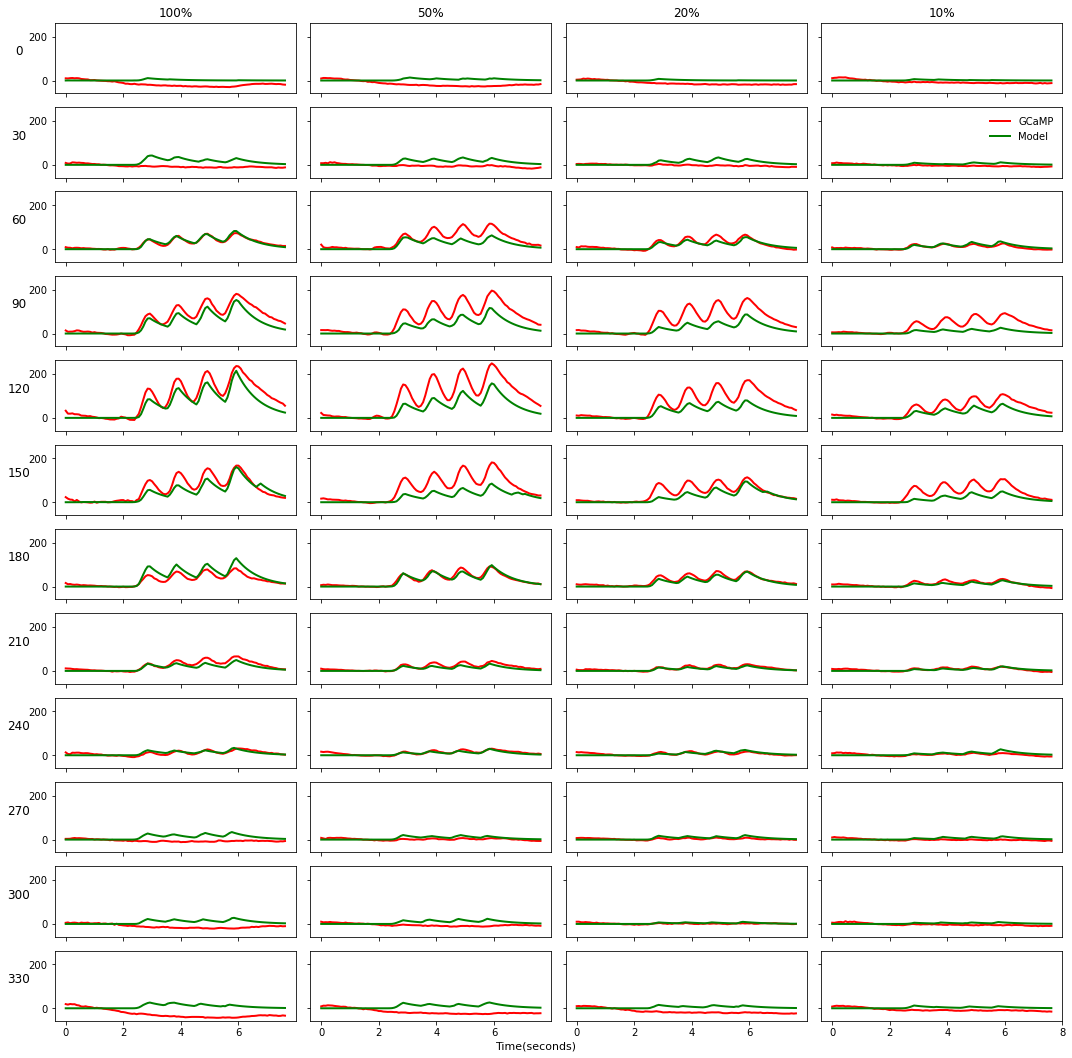

In [13]:
contrast = [100, 50, 20, 10]
#utils.plot_data_twinaxis([T4_arclight[10:,0:8], T4_gcamp[10:,0:8]], ylim=(-0.20,2.50), savefig=True, title='Gratings_SpeedPDND');
#utils.plot_data_twinaxis([T4_arclight, T4_gcamp], fig_size=(15,15),speed=velocity,ylim1=(-0.04,0.10),ylim2=(-0.30,2.60),savefig=False, title='Ori_Vel');
utils.plot_data([T4_gcamp[:100,48:96], T4Ca_model[:100,48:96]], ori=True,contrast=True,label=['GCaMP','Model'],c=['r','g'], fig_size=(15,15),speed=contrast,savefig=False, title='Ori_Vel');
#plt.savefig('figures/scipymini_wholedatasetfit/Ori_Contrast_model.pdf',dpi=1000)

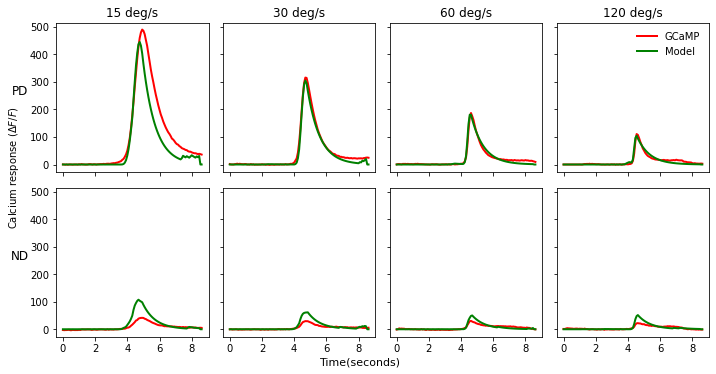

In [14]:
velocity=[15,30,60,120]
utils.plot_data([T4_gcamp[:,96:104], T4Ca_model[:,96:104]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
#plt.savefig('figures/scipymini_wholedatasetfit/EdgePDND_model.pdf',dpi=1000)

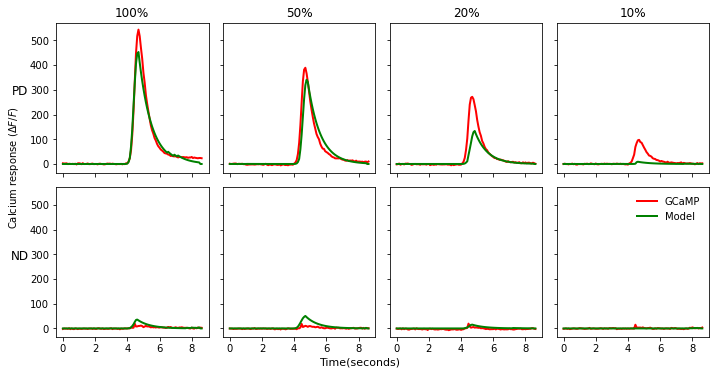

In [15]:
contrast = [100, 50, 20, 10]
utils.plot_data([T4_gcamp[:,104:112], T4Ca_model[:,104:112]], label=['GCaMP','Model'],speed=contrast,contrast=True,c=['r','g'])

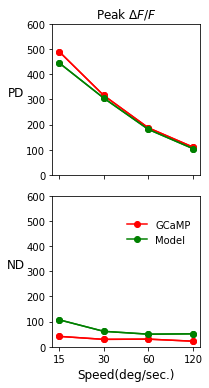

In [16]:
data_list = [T4_gcamp[:,96:104], T4Ca_model[:,96:104]]
velocity = [15, 30, 60, 120]
utils.plot_modelpeaktuning(data_list, speed=velocity, ylim1=(0,600),ylim2=(0.0,600.0),color=['r','g'],title='',savefig=False)
#plt.savefig('figures/scipymini_wholedatasetfit/EdgePDND_peaktuning.pdf',dpi=1000)

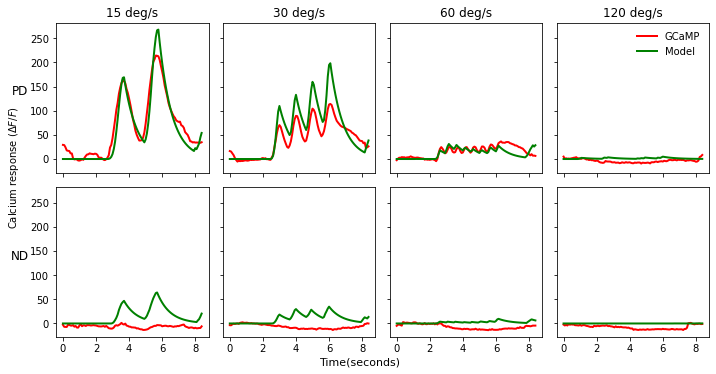

In [17]:
velocity=[15,30,60,120]
utils.plot_data([T4_gcamp[:110,[16,17,18,19,40,41,42,43]], T4Ca_model[:110,[16,17,18,19,40,41,42,43]]], label=['GCaMP','Model'],c=['r','g'],speed=velocity)
#plt.savefig('figures/scipymini_wholedatasetfit/GratingsPDND_model.pdf',dpi=1000)

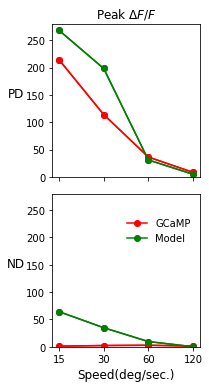

In [56]:
data_list = [T4_gcamp[:110,[16,17,18,19,40,41,42,43]], T4Ca_model[:110,[16,17,18,19,40,41,42,43]]]
velocity = [15, 30, 60, 120]
utils.plot_modelpeaktuning(data_list, speed=velocity, ylim1=(0,280),ylim2=(0.0,280),color=['r','g'],title='',savefig=False)
#plt.savefig('figures/scipymini_wholedatasetfit/GratingsPDND_peaktuning.pdf',dpi=1000)

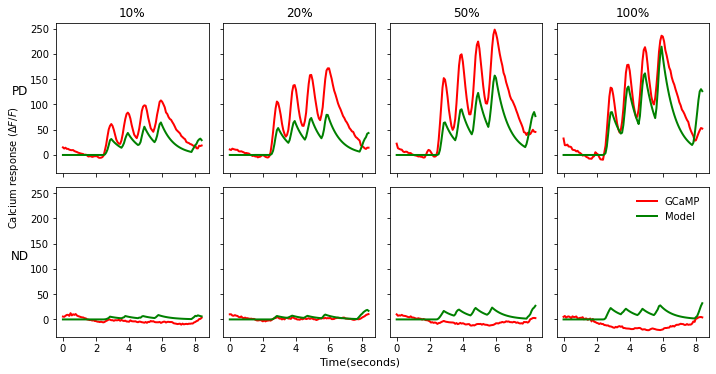

In [57]:
contrast=[10,20,50,100]
utils.plot_data([T4_gcamp[:110,[67,66,65,64,91,90,89,88]], T4Ca_model[:110,[67,66,65,64,91,90,89,88]]], label=['GCaMP','Model'],c=['r','g'],speed=contrast,contrast=True)
#plt.savefig('figures/scipymini_wholedatasetfit/ContrastPDND_model.pdf',dpi=1000)

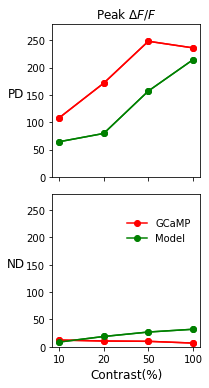

In [58]:
data_list = [T4_gcamp[:110,[67,66,65,64,91,90,89,88]], T4Ca_model[:110,[67,66,65,64,91,90,89,88]]]
contrast = [10,20,50,100]
utils.plot_modelpeaktuning(data_list, speed=contrast, contrast=True,ylim1=(0,280),ylim2=(0.0,280),color=['r','g'],title='',savefig=False)
#plt.savefig('figures/scipymini_wholedatasetfit/ContrastPDND_peaktuning.pdf',dpi=1000)

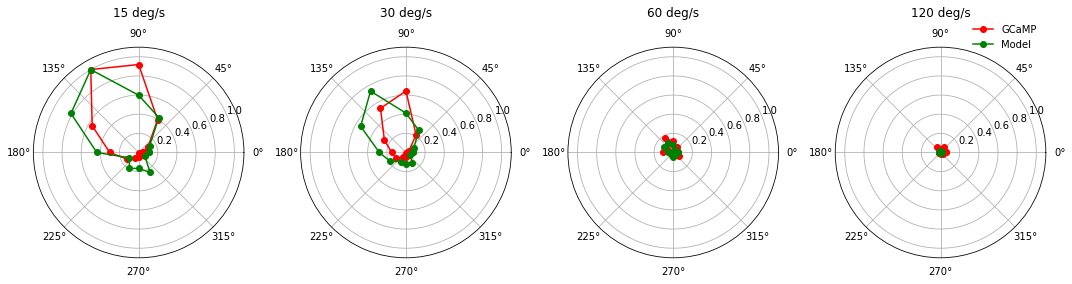

In [27]:
data_list = [T4_gcamp[:,0:48], T4Ca_model[:105,0:48]]
velocity = [15, 30, 60, 120]
peak_tuning = utils.calc_peaktuning(data_list, speed=velocity)
utils.plot_oripeaktuning(data_list,speed=velocity, label=['GCaMP','Model'],fig_size=(15,4), ylim1=(0.0,1.1),ylim2=(0.0,1.1),color=['r','g'],title='Speed_Ori_Tuning');
#plt.savefig('figures/scipymini_wholedatasetfit/OriVelPolar_model.pdf',dpi=1000)

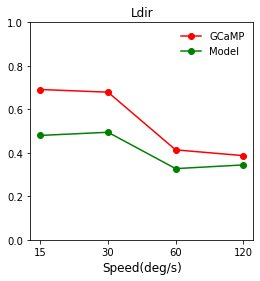

In [28]:
utils.plot_Ldir_mag(peak_tuning, title='Ldir_Speed_Ori_Tuning',savefig=False);
#plt.savefig('figures/scipymini_wholedatasetfit/OriVelLdir_model.pdf',dpi=1000)

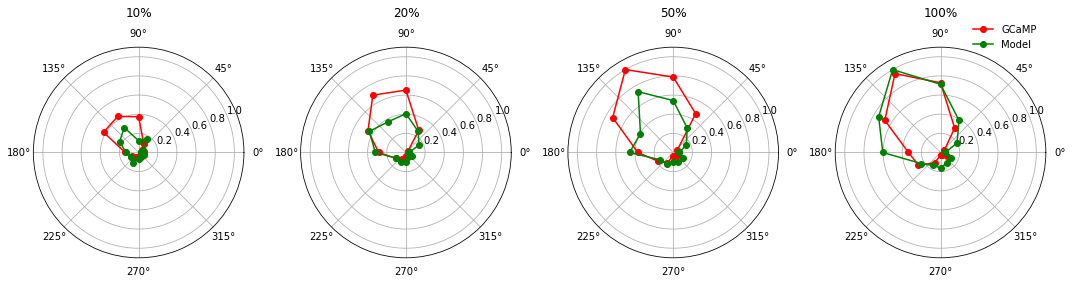

In [25]:
data_list = [T4_gcamp[:,48:96], T4Ca_model[:105,48:96]]
#velocity = [15, 30, 60, 120]
contrast = [10, 20, 50, 100]
peak_tuning = utils.calc_peaktuning(data_list, speed=contrast, contrast=True)
utils.plot_oripeaktuning(data_list,speed=contrast, label=['GCaMP','Model'],contrast=True,fig_size=(15,4), ylim1=(0.0,1.1),ylim2=(0.0,1.1),color=['r','g'],title='Speed_Ori_Tuning');
#plt.savefig('figures/scipymini_wholedatasetfit/OriContrastPolar_model.pdf',dpi=1000)

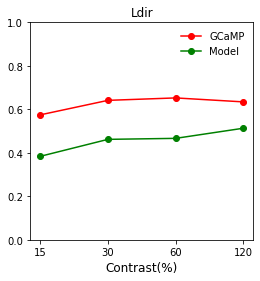

In [26]:
utils.plot_Ldir_mag(peak_tuning, title='',contrast=True,savefig=False);
#plt.savefig('figures/scipymini_wholedatasetfit/OriContrastLdir_model.pdf',dpi=1000)

In [18]:
save_modeldata = True
if save_modeldata:
    np.save('/Volumes/Elements/Project_T4_VoltageCalcium/PaperFigures/data/modeldata/T4Ca_model.npy',T4Ca_model)

In [63]:
save_para = True
if save_para:
    np.save('model_parameters/scipymini_newmodel_alldatasetcombined.npy',model_para)